<a href="https://colab.research.google.com/github/ganeshsembedded-maker/customer-churn-prediction-ml/blob/main/churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
dataSet = pd.read_excel('/content/train.xlsx')
dataSetTest = pd.read_excel('/content/test.xlsx')
display(dataSet.head(10))

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [ ]:
trainData = dataSet.copy()
testData = dataSetTest.copy()

In [ ]:
trainData.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
trainData.info()
trainData.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


(7043, 21)

In [ ]:
trainData.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
trainData.duplicated().sum()
trainData.drop_duplicates(inplace=True)

In [ ]:
trainData.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
numericalData = trainData.select_dtypes(include='number')
catigoricalData = trainData.select_dtypes(include='object')

In [ ]:
display(numericalData.head(5))

,SeniorCitizen,tenure,MonthlyCharges
0,0,1,29.85
1,0,34,56.95
2,0,2,53.85
3,0,45,42.30
4,0,2,70.70


In [ ]:
display(catigoricalData.head(5))

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,1889.5,No
2,3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,108.15,Yes
3,7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),1840.75,No
4,9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,151.65,Yes


In [ ]:
one_hot_encoded_data = pd.get_dummies(trainData, drop_first=True)
display(one_hot_encoded_data.head())

,SeniorCitizen,tenure,MonthlyCharges,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,customerID_0013-MHZWF,customerID_0013-SMEOE,customerID_0014-BMAQU,...,TotalCharges_8529.5,TotalCharges_8543.25,TotalCharges_8547.15,TotalCharges_8564.75,TotalCharges_8594.4,TotalCharges_8670.1,TotalCharges_8672.45,TotalCharges_8684.8,TotalCharges_,Churn_Yes
0,0,1,29.85,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0,34,56.95,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0,2,53.85,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,0,45,42.30,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0,2,70.70,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [ ]:

trainData['TotalCharges'] = pd.to_numeric(trainData['TotalCharges'], errors='coerce')


trainData.dropna(subset=['TotalCharges'], inplace=True)


trainData_processed = trainData.drop('customerID', axis=1)


numerical_features = trainData_processed.select_dtypes(include=['int64', 'float64']).columns
categorical_features = trainData_processed.select_dtypes(include='object').columns


one_hot_encoded_data = pd.get_dummies(trainData_processed[categorical_features], drop_first=True)

final_processed_data = pd.concat([trainData_processed[numerical_features], one_hot_encoded_data], axis=1)

display(final_processed_data.head())

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,False,True,False,False,True,False,...,False,False,False,False,False,True,False,True,False,False
1,0,34,56.95,1889.50,True,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
2,0,2,53.85,108.15,True,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,True
3,0,45,42.30,1840.75,True,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
4,0,2,70.70,151.65,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,True


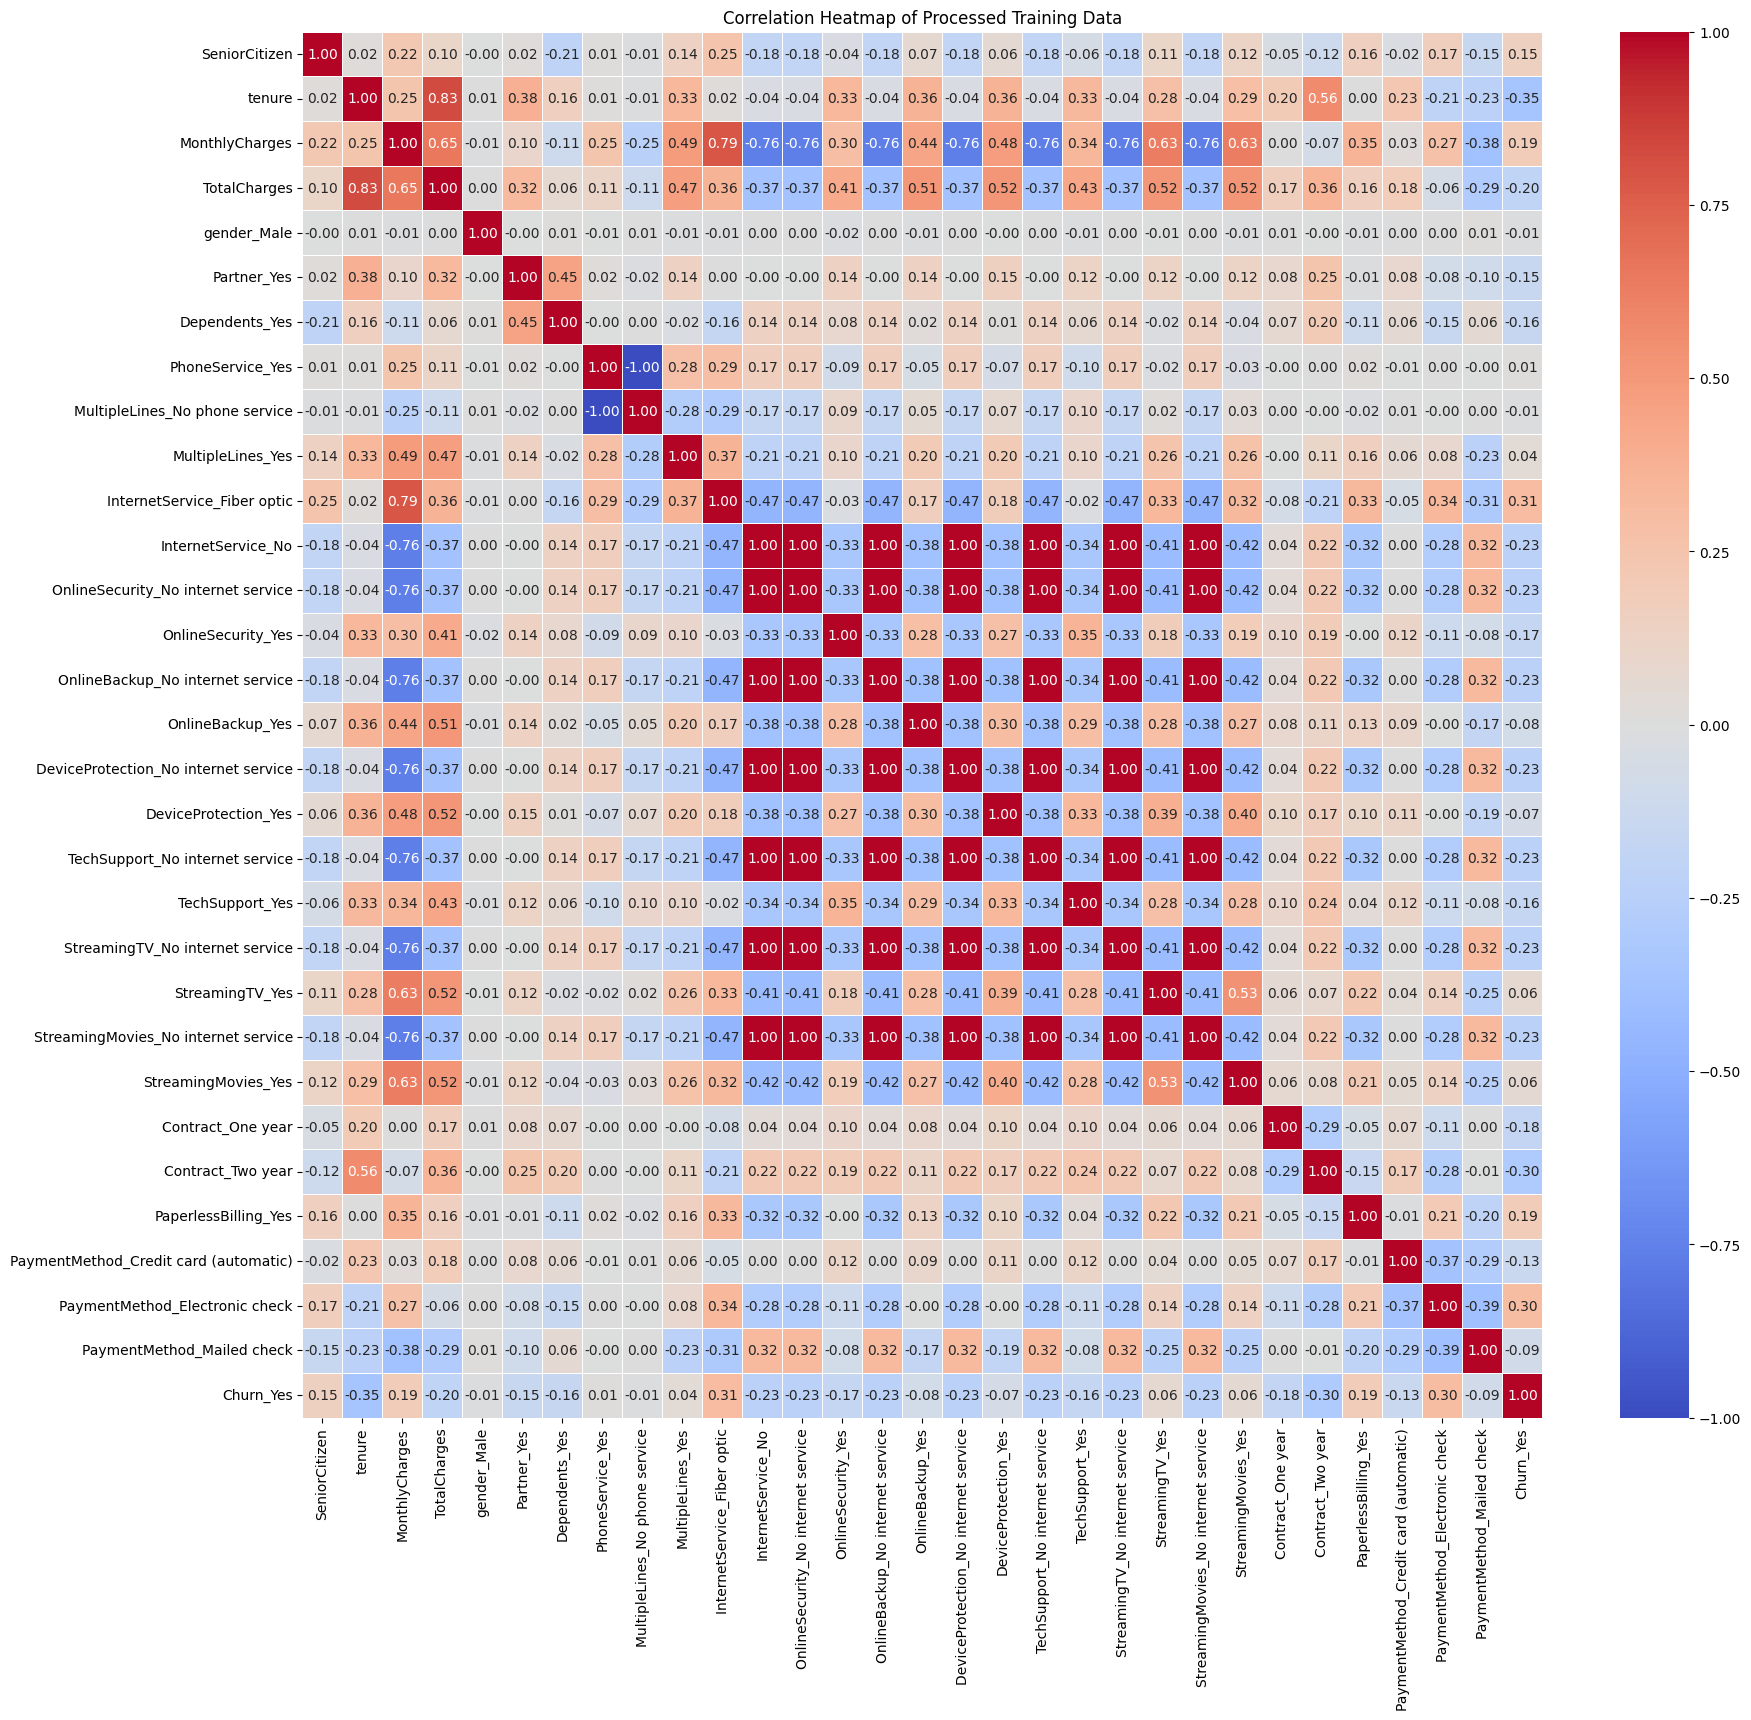

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix using the final_processed_data
correlation_matrix = final_processed_data.corr()

# Plot the correlation heatmap
plt.figure(figsize=(20,18)) # Adjust figure size for better readability given the number of features
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Processed Training Data')
plt.show()

In [ ]:
final_processed_data.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
SeniorCitizen,1.000000,0.015683,0.219874,0.102411,-0.001819,0.016957,-0.210550,0.008392,-0.008392,0.142996,...,0.105445,-0.182519,0.119842,-0.046491,-0.116205,0.156258,-0.024359,0.171322,-0.152987,0.150541
tenure,0.015683,1.000000,0.246862,0.825880,0.005285,0.381912,0.163386,0.007877,-0.007877,0.332399,...,0.280264,-0.037529,0.285402,0.202338,0.563801,0.004823,0.232800,-0.210197,-0.232181,-0.354049
MonthlyCharges,0.219874,0.246862,1.000000,0.651065,-0.013779,0.097825,-0.112343,0.248033,-0.248033,0.490912,...,0.629668,-0.763191,0.627235,0.004810,-0.073256,0.351930,0.030055,0.271117,-0.376568,0.192858
TotalCharges,0.102411,0.825880,0.651065,1.000000,0.000048,0.319072,0.064653,0.113008,-0.113008,0.469042,...,0.515709,-0.374878,0.519867,0.170569,0.358036,0.157830,0.182663,-0.060436,-0.294708,-0.199484
gender_Male,-0.001819,0.005285,-0.013779,0.000048,1.000000,-0.001379,0.010349,-0.007515,0.007515,-0.008883,...,-0.007124,0.004745,-0.010105,0.007755,-0.003603,-0.011902,0.001632,0.000844,0.013199,-0.008545
Partner_Yes,0.016957,0.381912,0.097825,0.319072,-0.001379,1.000000,0.452269,0.018397,-0.018397,0.142561,...,0.124483,-0.000286,0.118108,0.083067,0.247334,-0.013957,0.082327,-0.083207,-0.096948,-0.149982
Dependents_Yes,-0.210550,0.163386,-0.112343,0.064653,0.010349,0.452269,1.000000,-0.001078,0.001078,-0.024307,...,-0.016499,0.138383,-0.038375,0.069222,0.201699,-0.110131,0.061134,-0.149274,0.056448,-0.163128
PhoneService_Yes,0.008392,0.007877,0.248033,0.113008,-0.007515,0.018397,-0.001078,1.000000,-1.000000,0.279530,...,-0.021383,0.171817,-0.033477,-0.003142,0.004442,0.016696,-0.006916,0.002747,-0.004463,0.011691
MultipleLines_No phone service,-0.008392,-0.007877,-0.248033,-0.113008,0.007515,-0.018397,0.001078,-1.000000,1.000000,-0.279530,...,0.021383,-0.171817,0.033477,0.003142,-0.004442,-0.016696,0.006916,-0.002747,0.004463,-0.011691
MultipleLines_Yes,0.142996,0.332399,0.490912,0.469042,-0.008883,0.142561,-0.024307,0.279530,-0.279530,1.000000,...,0.257804,-0.210794,0.259194,-0.003594,0.106618,0.163746,0.060319,0.083583,-0.227672,0.040033


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


selected_features_filtered = target_corr[(abs(target_corr) >= 0.15)].index.tolist()


if 'Churn_Yes' in selected_features_filtered:
    selected_features_filtered.remove('Churn_Yes')

print(f"Selected features for modeling: {selected_features_filtered}")


X = final_processed_data[selected_features_filtered]
y = final_processed_data['Churn_Yes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


model = LogisticRegression(random_state=42, solver='liblinear')
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)


Selected features for modeling: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Dependents_Yes', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'OnlineBackup_No internet service', 'DeviceProtection_No internet service', 'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingMovies_No internet service', 'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes', 'PaymentMethod_Electronic check']


In [ ]:
print(f"\nModel Accuracy: {accuracy:.4f}")


Model Accuracy: 0.8017


In [ ]:
print(f"\nClassification Report:\n{report}")



Classification Report:
              precision    recall  f1-score   support

       False       0.85      0.89      0.87      1033
        True       0.65      0.56      0.60       374

    accuracy                           0.80      1407
   macro avg       0.75      0.72      0.73      1407
weighted avg       0.79      0.80      0.80      1407



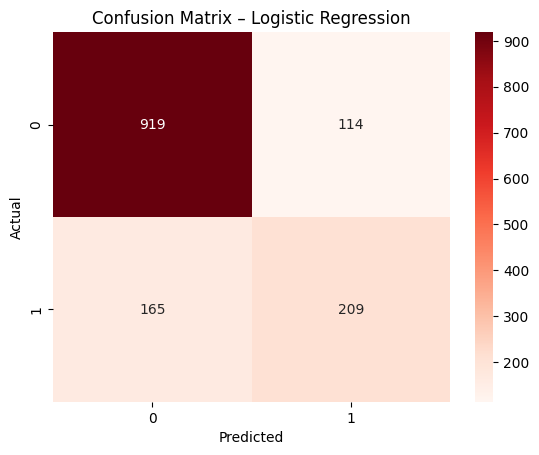


Confusion Matrix:
[[919 114]
 [165 209]]


In [ ]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')
plt.title("Confusion Matrix – Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
print(f"\nConfusion Matrix:\n{conf_matrix}")